#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp
%pip install pandas

In [2]:
# Importing the negative selection.
from aisp.CSA import AIRS
# Importando os demais pacotes. 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Carregar a base de dados e binarizando-os**

Carregando a base de dados "Mushroom". Essa base de dados contém informações sobre cogumelos com duas categorias de saída: venenosos e comestíveis. Ela inclui as seguintes 22 características por amostra:

- Forma do chapéu (Cap-shape): convexo, cônico, plano, em formato de nódulo, em formato de sino, afundado.
- Superfície do chapéu (Cap-surface): fibroso, sulcado, liso, escamoso.
- Cor do chapéu (Cap-color): marrom, cinza, rosa, verde, roxo, vermelho, branco, amarelo, chocolate.
- Contusões (Bruises): sim, não.
- Odor: amêndoa, anis, creosoto, podre, picante, peixe, farinha, cogumelo, sem odor.
- Fixação das lamelas (Gill-attachment): anexada, solta, nenhuma.
- Espaçamento das lamelas (Gill-spacing): próximo, lotado.
- Tamanho das lamelas (Gill-size): largo, estreito.
- Cor das lamelas (Gill-color): preto, marrom, rosa, cinza, laranja, rosa, verde, roxo, vermelho, branco, amarelo, chocolate.
- Forma do caule (Stalk-shape): alargando, afinando.
- Raiz do caule (Stalk-root): bulbosa, clube, taça, igual, enraizada, ausente.
- Superfície do caule acima do anel (Stalk-surface-above-ring): fibrosa, escamosa, sedosa, lisa.
- Superfície do caule abaixo do anel (Stalk-surface-below-ring): fibrosa, escamosa, sedosa, lisa.
- Cor do caule acima do anel (Stalk-color-above-ring): marrom, cinza, rosa, laranja, branco, amarelo, vermelho, chocolate.
- Cor do caule abaixo do anel (Stalk-color-below-ring): marrom, cinza, rosa, laranja, branco, amarelo, vermelho, chocolate.
- Tipo de véu (Veil-type): parcial, universal.
- Cor do véu (Veil-color): marrom, laranja, branco, amarelo.
- Número de anéis (Ring-number): nenhum, um, dois.
- Tipo de anel (Ring-type): evanescente, grande, nenhum, pendente.
- Cor da impressão de esporos (Spore-print-color): preto, marrom, rosa, verde, laranja, roxo, branco, amarelo, chocolate.
- População: abundante, agrupada, numerosa, dispersa, várias, solitária.
- Habitat: gramados, folhas, pradarias, caminhos, áreas urbanas, resíduos, madeira.

Essa base de dados também está disponível nos seguintes links: [kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification) e [UCIML](https://archive.ics.uci.edu/dataset/73/mushroom).

Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

In [3]:
# Carrega a base de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms = pd.read_csv(url, header=None)

Normaliza a base de dados para binaria usando a codificação one-hot utilizando o método "get_dummies" do pandas.

In [4]:
# Cria nomes de colunas
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
           'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

mushrooms.columns = columns
# Converte todas as variáveis categóricas em variáveis binárias
mushrooms_binary = pd.get_dummies(mushrooms, columns=columns[1:], drop_first=True)
dados = mushrooms_binary.drop('class', axis=1).to_numpy()
classes = mushrooms['class'].replace(['e', 'p'], ['Comestível', 'Venenoso']).to_numpy()

print(f"Número de amostras: {dados.shape[0]}\nNúmero de dimensões: {dados.shape[1]}")

Número de amostras: 8124
Número de dimensões: 95


#### **4 Separação de treinamento e teste (30% para teste)**

In [5]:
# Gerando os conjuntos de treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.30)

### Método da Distância Máxima Média para Rotular Amostras Não-próprias

#### **5. Validação Cruzada.**

O desempenho do modelo é avaliado por meio de validação cruzada. Em cada iteração, 10% dos dados de treinamento são reservados para teste.

In [6]:
accuracy_list = list()

# Model Initialization
model = AIRS(algorithm='binary-features', k=10, affinity_threshold=0.7, rate_clonal=20)

for i in range(0, 50):
    # Dividir o conjunto de treinamento, separando 1/10 dos dados para validação.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Ajustar o modelo usando os outros 90% dos dados
    model.fit(train_model_x, train__model_y, verbose=False)

    # Calculo de acurácia para conjunto de validação: 
    prev_y = model.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Exibir a acurácia média e seu desvio padrão
print(f"A acurácia média é: {np.average(np.array(accuracy_list)):.6f}")
print(f"Desvio padrão das acurácias: {np.std(np.array(accuracy_list)):.6f}")

A acurácia média é: 0.940070
Desvio padrão das acurácias: 0.018554


**6. Ajuste do modelo usando o conjunto de treinamento no seu total**

In [7]:
# Criando o modelo com todos os dados separados para treinamento.
model.fit(train_x, train_y)
print('Modelo Total Ajustado!')

✔ Set of memory cells for classes (Comestível, Venenoso) successfully generated:  ┇██████████┇ 5686/5686 memory cells for each aᵢ

Modelo Total Ajustado!


**7. Exibir relatório e matriz de confusão para o conjunto de teste**

A acuracia é 0.9540607054963085
              precision    recall  f1-score   support

  Comestível       0.95      0.97      0.95      1229
    Venenoso       0.96      0.94      0.95      1209

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



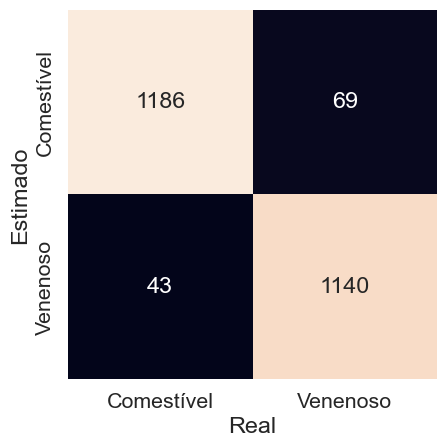

In [8]:
# Prevendo às classes com as amostras de teste.
prev_y = model.predict(test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.set(font_scale=1.4) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=model.classes, yticklabels=model.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()